|             | $H_{0}$ is True   | $H_{0}$ is False   |
| ----------- | :---           |           ---:  |
| Accept H(0) | True Negative  | False Positive  |
| Reject H(0) | False Negative | True Positive   |

    Null:                     $H_{0}$
    Alternative Hypothesis:   $H_{A}$
    
    True Positive:            $H_{0}$=TRUE
    True Negative:            $H_{0}$=TRUE
    Type I(False Positive):   H(FP)
    Type II(False Negative):  H(FN)

> #### The quarterly results look great!
>
> - Revenue was off the chart.
> - Profits were higher than ever.
>
> |             | $H_{0}$ is True   | $H_{0}$ is False   |
> | ----------- | :---           |           ---:  |
> | Accept $H_{0}$ | True Negative  | False Positive  |
> | Reject $H_{0}$ | False Negative | True Positive   |
>
>  *Everything* is going according to **plan**.

<div class="alert alert-block alert-info">

# **Hypothesis**

### Cases
- No Change
- Increased
- Decreased
</div>

Rolling Dice

10 Dice & Average

Normal Distribution

In [167]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

In [9]:
# Define a roll [1,2,3,4,5,6]

# Set a sample size of 10
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1,7, (nrows,ncols))

data[:4]

array([[6, 5, 5, 4, 5, 4, 3, 5, 1, 5],
       [1, 4, 6, 1, 4, 2, 3, 2, 3, 1],
       [4, 6, 4, 6, 6, 4, 6, 3, 3, 1],
       [4, 3, 3, 6, 6, 2, 4, 5, 2, 5]])

In [5]:
# mean of each row
calculated_averages = data.mean(axis=1)
calculated_averages

array([3.6, 4.8, 3. , 3.3, 4.5, 4. , 3.5, 4.8, 3. , 4.3, 3.9, 3.2, 4.2,
       3.6, 3.4, 3.3, 4.1, 1.9, 3.2, 3.2, 4.2, 3. , 4.4, 3.3, 3.4, 2.8,
       2.9, 3.5, 3.3, 3.9, 2.9, 4.1, 3.4, 2.7, 4.1, 2.8, 3.6, 4. , 4. ,
       3.5, 4. , 3.8, 3.5, 3.4, 3.9, 3.4, 3.6, 2.6, 4.2, 2.1, 3.2, 2.7,
       3.4, 4.5, 3.1, 3.8, 3.4, 4.4, 4.4, 3.7, 2.7, 3.4, 3.4, 3.1, 3.3,
       3.1, 3.7, 3.6, 3.4, 3.6, 3.5, 4.4, 2.8, 3.8, 4.1, 3.9, 3.6, 3.5,
       3. , 3.3, 4. , 3.7, 4.3, 4.1, 4.3, 4.3, 3.2, 4.1, 3.6, 3.2, 2.8,
       3.7, 4. , 3.5, 3.7, 4.7, 3.7, 3.4, 3.8, 3.7])

10 Dice Outcomes is Uniformly Distributed

In [11]:
# Plot Outcomes

Text(0.5, 1.0, 'Outcome')

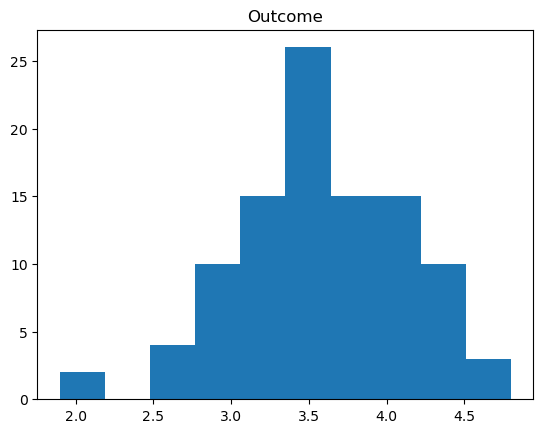

In [10]:
plt.hist(calculated_averages)
plt.xlabel('')
plt.ylabel('')
plt.title('Outcome')

## One Sample T-Test

1. Plot Distributions
2. Establish Hypothesis

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env

from IPython.display import display, Latex

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)

<AxesSubplot:>

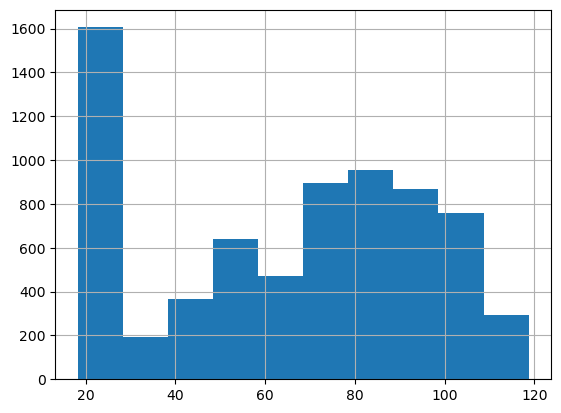

In [15]:
df.monthly_charges.hist()

In [18]:
churn_sample = df[df['churn']=='Yes']['monthly_charges']

<AxesSubplot:>

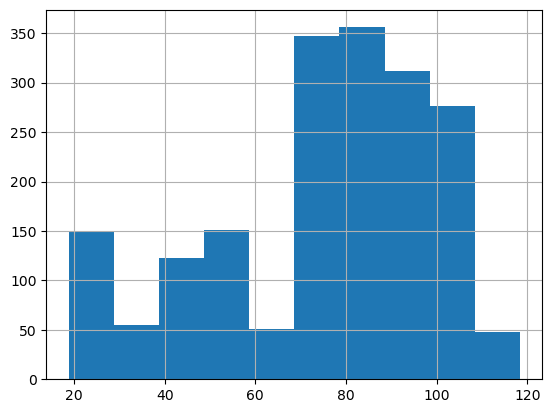

In [19]:
churn_sample.hist()

## Set Hypothesis
Null Hypothesis

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges

Alternative Hypothesis

$H_{A}$: Mean of a mothly charges of churned customers > Mean of mohtly charges of customers

## Set Alpha Value

$\alpha$ = .05

In [20]:
alpha = 0.05

In [21]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [60]:
df.churn.value_counts()
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


### TEST 1

In [64]:
if p/2 > alpha:
    display(Latex((f"We fail to reject $H_{0}$")))
elif t < 0:
    display(Latex((f"We fail to reject $H_{0}$")))
else:
    display(Latex((f"We reject $H_{0}$")))


<IPython.core.display.Latex object>

# Hypothesis 2

Mnthly charges of churned customers are SIGNIFICANTLY DIFFERENT than overall customers

Compare OVERALL MEAN to SAMPLE MEAN

OVERALL MEAN = ALL CUSTOMERS

SAMPLE MEAN = CHURNED CUSTOMERS

In [56]:
t,p = stats.ttest_1samp(churn_sample,overall_mean)
t,p,alpha

(16.96540308050567, 3.740639299382399e-60, 0.05)

### TEST 2

In [66]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# T Statistics Formula

Image

<img src="./t_statistic_formula.png" align="left" >

Latex

# $t_{\overline{x}} = \frac{\overline{x}-u_{0}}{\sigma / \sqrt{N}}$

### Independent T-Test (A.K.A 2 Sample T-Test)

## Example 3

### The monthly charge for customers WHO CHURN is less than the MEAN of ALL CUSTOMERS

$H_{0}$: Mothly charges for who churn >= mean of all

$H_{0}$: Mothly charges for who churn < mean of all


>=

# Tail Total?

Less than MEAN of ALL = 1 side

= 1 Tail

=p/2

In [71]:
t,p=stats.ttest_1samp(churn_sample,overall_mean)
t,p

(16.96540308050567, 3.740639299382399e-60)

In [72]:
print(p/2<alpha)

True


In [73]:
print(t<0)

False


#### Reject Null Hypothesis $H_{0}$

In [75]:
p/2 < alpha and t<0

False

In [79]:
if(p/2<alpha)&(t<0):
    print("reject null")
else:
    print("failed to reject")

failed to reject


# ANOVA - Analysis of Variance

Goal: Compare means of groups a, b & c.

variance = STD^2

In [80]:
churn_var = churn_sample.var()

In [81]:
print(churn_var)

608.4141833954315


In [83]:
no_churn_sample = churn_sample = df[df.churn == 'No'].monthly_charges

In [86]:
# equar_var = False
t,p=stats.ttest_ind(churn_sample,no_churn_sample, equal_var=False)

In [ ]:
# 1 Tail
# Compare Alpha > P2 & T < 0

# Independence Test

### Example 2

Are monthly charges for customers WHO CHURN
significantly different thatn the monthly charges of those WHO DO
### Hypothesis
H_0 = 
H_A = 

### Two-Tailed

- Compare P to Alpha

### Test

Reject Null

p<alpha

In [87]:
t,p=stats.ttest_ind(churn_sample,no_churn_sample,equal_var=False)
t,p

(0.0, 1.0)

In [88]:
p<alpha
print("reject null")

reject null


### Example 3

Are monthly charges for customers WHO CHURN
significantly **LESS THAN** the monthly charges of those WHO DO NOT

```CHURN.mean()  <  NO_CHURN.mean()```

### Hypothesis
H_0 = Mean for churned customers is **>=** to the **MEAN** for customers who did not

``` CHURN.mean  >=  NO_CHURN.mean()```

H_A = Mean for churned customer is **<** for customers who do not churn

``` CHURN.mean()  <  NO_CHURN.mean()```

### Two-Tailed

- Compare P to Alpha

## ANOVA

| Null Hypothesis        | $H_{0}$ | $\mu_{A} = \mu_{B} = \mu_{C}$ |
|------------------------|---------|-------------------------------|
| Alternative Hypothesis | $H_{0}$ | $\mu_{A} = \mu_{B} = \mu_{C}$ | 

In [89]:
df = sns.load_dataset('iris')
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [90]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length

In [176]:
versicolor_sepal_length

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, dtype: float64

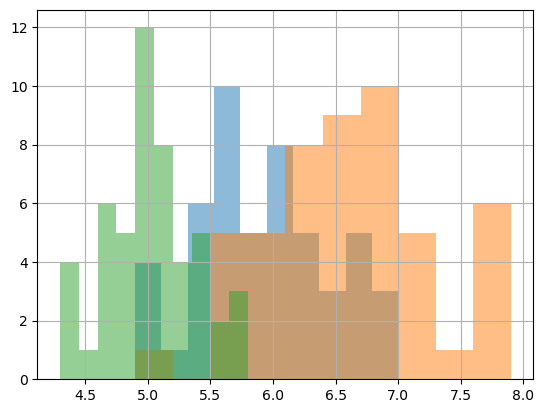

In [95]:
versicolor_sepal_length.hist(alpha=.5)
virginica_sepal_length.hist(alpha=.5)
setosa_sepal_length.hist(alpha=.5)
plt.show()

H(0): For the mean sepal_length is all equal
H(A): For the mean sepal_length not all equal

In [96]:
alpha = 0.05

#independence
#Observations
#equal variance

# Comparison of Variance vs. Comparison of Means

Test for equal variance.

H_0: variances are all equal
H_A: variances are not equal

In [106]:
t,p=stats.levene(versicolor_sepal_length,virginica_sepal_length,setosa_sepal_length)

In [110]:
# cutoff value
alpha = 0.05

In [111]:
if p>alpha:
    print("Run ANOVA")
else:
    print("Fail: No ANOVA Run: Non-Parametric(Kruskal-Wallis Test)")

Fail: No ANOVA Run: Non-Parametric(Kruskal-Wallis Test)


In [143]:
stats.f_oneway(versicolor_sepal_length,virginica_sepal_length,setosa_sepal_length)

F_onewayResult(statistic=119.26450218450472, pvalue=1.6696691907693648e-31)

In [142]:
stats.kruskal(versicolor_sepal_length,virginica_sepal_length,setosa_sepal_length)

KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

# $t = \frac{\overline{x}-u}{\sigma / \sqrt{N}}$

$\mu$ = Population Mean

$\overline{x}$ = Sample Mean

$\sigma$ = Standard Deviation

$N$ = Sample Size

# $t = \dfrac{\overline{x}-u}{\tfrac{\sigma}{\sqrt{N}}}$

# $t = \tfrac{\overline{x}-u}{\dfrac{\sigma}{\sqrt{N}}}$

$\[ x = \dfrac{\dfrac{a}{b}}{c} \]$

$x
  = \dfrac{\dfrac{a}{b}}{c}
  = \dfrac{\frac{\textstyle a}{\textstyle b}}{c}
  = \dfrac{\frac{a}{b}}{c}
  \equiv \dfrac{\tfrac{a}{b}}{c}$

In [144]:
mpg = sns.load_dataset('mpg')

In [162]:
type(mpg)

pandas.core.frame.DataFrame

In [179]:
mpg.isna().sum()
mpg[~mpg.horsepower.isna()]
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [183]:
mpg=mpg[~mpg.horsepower.isna()]

In [184]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [185]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [186]:
mpg.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

# Is the horsepower of vehicles different across the distinct origin of the vehicles?

$H_{0}$: mean_horsepower_USA == mean_horsepower

$H_{a}$: mean_horsepower from at least 2 countries significantly differetn

#### Assumptions
1. At least 30 observations met.
2. equal population variance.
3. Groups are independent of each other.

<AxesSubplot:>

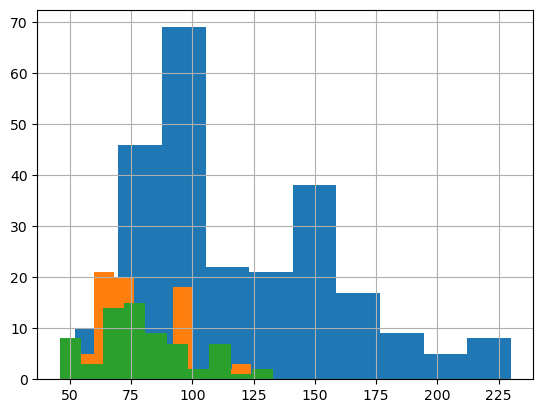

In [187]:
mpg[mpg['origin'] =='usa']['horsepower'].hist()
mpg[mpg['origin'] =='japan']['horsepower'].hist()
mpg[mpg['origin'] =='europe']['horsepower'].hist()

In [188]:
usa = mpg[mpg['origin'] =='usa']['horsepower']
japan = mpg[mpg['origin'] =='japan']['horsepower']
europe = mpg[mpg['origin'] =='europe']['horsepower']

In [189]:
type(usa)

pandas.core.series.Series

In [190]:
# validate the variance assumptions
stats.levene(usa, japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

In [191]:
stats.kruskal(usa,japan,europe)

KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

In [192]:
t,p = stats.ttest_ind(usa,japan,equal_var=False)

In [193]:
t,p

(12.092022948407953, 1.5146320352820458e-27)

# $t = \dfrac{\overline{x}-u}{\tfrac{\sigma}{\sqrt{N}}}$

In [ ]:
# ttest()

# p= # small p value the more certain that there is a significant difference
# t=<0 # how big the difference in which direction

# p is small = not due to chance

# Correlation

### Weight vs. Length of Mice

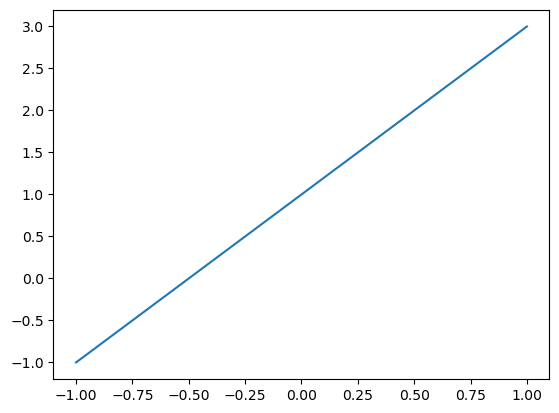

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 50)
#print(x)
y = 2*x + 1

plt.plot(x, y)
plt.show()

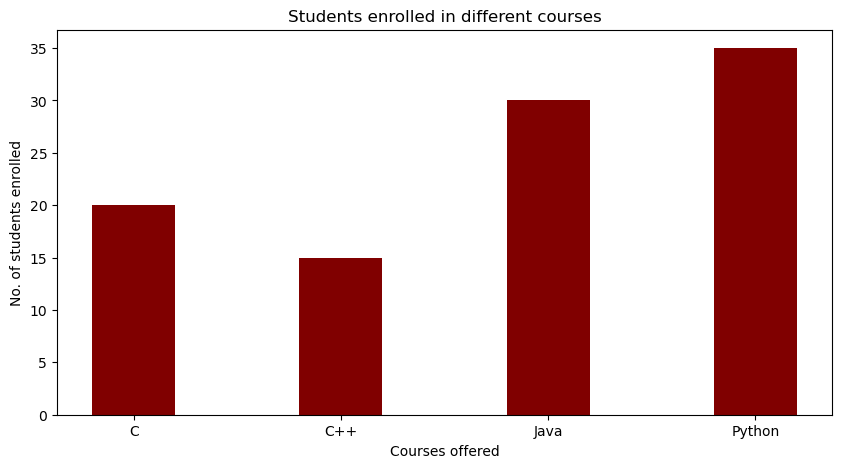

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

# As lenght increases,  weight increases  [Positive Correlation]

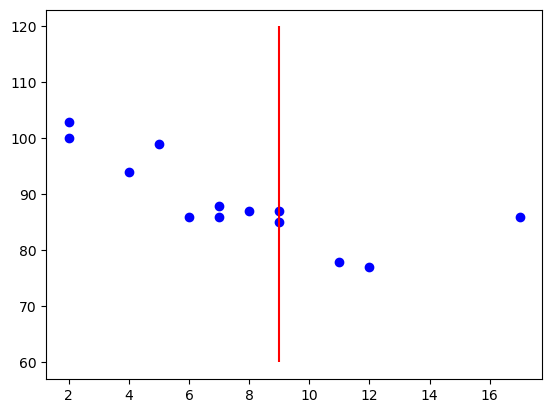

In [11]:

import matplotlib.pyplot as plt
 
 
x =[5, 7, 8, 7, 2, 17, 2, 9,
    4, 11, 12, 9, 6]
 
y =[99, 86, 87, 88, 100, 86,
    103, 87, 94, 78, 77, 85, 86]
 
plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.vlines(9, 60, 120, color='red')
plt.vlines(9, 60, 120, color='black')

plt.show()

# As lenght decreases,  weight decreases  [Negative Correlation]

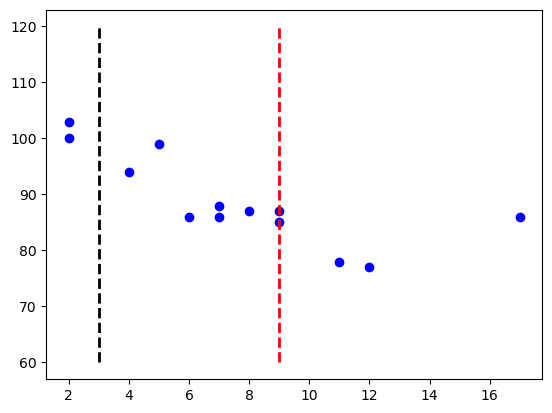

In [17]:

import matplotlib.pyplot as plt
 
 
x =[5, 7, 8, 7, 2, 17, 2, 9,
    4, 11, 12, 9, 6]
 
y =[99, 86, 87, 88, 100, 86,
    103, 87, 94, 78, 77, 85, 86]
 
plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.vlines(9, 60, 120, color='red', linestyle='--', linewidth=2)
plt.vlines(3, 60, 120, color='black', linestyle='--', linewidth=2)

plt.show()

Text(1, 17, 'y = -0.89 + 2.31x')

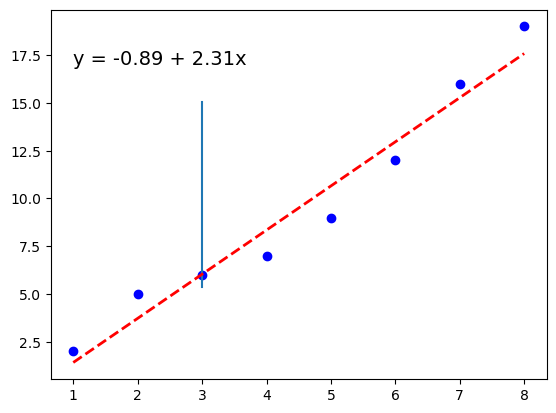

In [20]:
import numpy as np
import matplotlib.pyplot as plt
#
plt.axvline(x=3, ymin=0.25, ymax=0.75)

#define data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([2, 5, 6, 7, 9, 12, 16, 19])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='blue')

#add line of best fit to plot
plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

# Determine if 2 samples have a linear relationship

## Pearson's R

$H_{0}$ - No linear relation

$H_{A}$ - No linear

In [ ]:
# Example 1

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


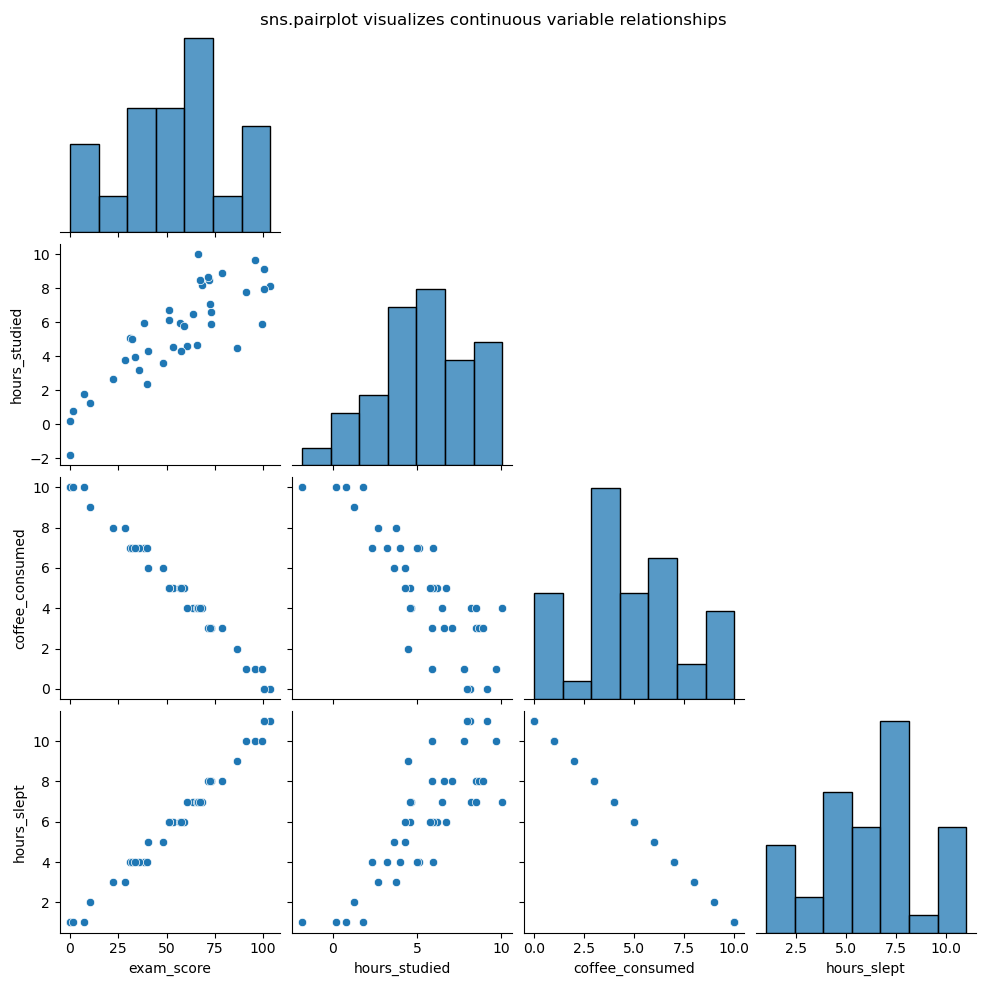

In [24]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

In [25]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
# alpha = 0.05
α = 1 - conf_interval

In [29]:
print(n)
print(degf)
print(conf_interval)
print(α)

40
38
0.95
0.050000000000000044


 # r = $\frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$


# $r_{xy} = \frac{\frac{1}{n} \sum(x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}$

Null: No linear relationship between hrs studied & exam score
Alt: Yes linear relationship between hrs studied & exam score

In [37]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
print(r_xy)

0.8351498542413306


$t = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^{2}_{xy}}}$

# T-Statistic & P-Value

In [40]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
print(t)

9.359998377263368


In [35]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
print(p)

2.0762953315463266e-11


In [38]:
p < α

True

# TLDR

In [41]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.8351498542413308, 2.0762953315462826e-11)